In [31]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from pathlib import Path

In [32]:
#Loading file into Path
data = Path('clean_data.csv')
#Reading data file
data_df = pd.read_csv(data)
data_df.head()

,ID,SEX,TOTAL CHOLESTROL,AGE,SMOKING STATUS,CIGS PER DAY,EDUCATION,PREVALENT CHD,PERIOD,BMI
0,6238,F,250.0,46,NO,0,2,NO,1,28.73
1,6238,F,260.0,52,NO,0,2,NO,2,29.43
2,6238,F,237.0,58,NO,0,2,NO,3,28.50
3,11263,F,228.0,43,NO,0,2,NO,1,30.30
4,11263,F,230.0,49,NO,0,2,NO,2,31.36


# Descriptive Stats

In [33]:
#Getting general info of the dataframe including number of data entries and data types 
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8262 entries, 0 to 8261
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8262 non-null   int64  
 1   SEX               8262 non-null   object 
 2   TOTAL CHOLESTROL  8262 non-null   float64
 3   AGE               8262 non-null   int64  
 4   SMOKING STATUS    8262 non-null   object 
 5   CIGS PER DAY      8262 non-null   int64  
 6   EDUCATION         8262 non-null   int64  
 7   PREVALENT CHD     8262 non-null   object 
 8   PERIOD            8262 non-null   int64  
 9   BMI               8262 non-null   float64
dtypes: float64(2), int64(5), object(3)
memory usage: 645.6+ KB


## We will be looking at period 1 and 3 data (beginning and end) of study

In [34]:
#Filter Data for Period 1 
period_1_data = data_df.loc[data_df['PERIOD']==1, :]
#Filter Data for Period 3 
period_3_data = data_df.loc[data_df['PERIOD']==3, :]

In [35]:
#Generating a general statistical table of all data for period 1 adn 3
data_1_summary = period_1_data.describe()
data_3_summary = period_3_data.describe()
print(data_1_summary)
print(data_3_summary)

                 ID  TOTAL CHOLESTROL          AGE  CIGS PER DAY    EDUCATION  \
count  2.754000e+03       2754.000000  2754.000000   2754.000000  2754.000000   
mean   5.017015e+06        235.058460    48.649237      8.498911     2.015251   
std    2.893404e+06         43.757461     8.288898     11.540395     1.031885   
min    6.238000e+03        113.000000    32.000000      0.000000     1.000000   
25%    2.509674e+06        204.000000    42.000000      0.000000     1.000000   
50%    5.016956e+06        232.000000    48.000000      0.000000     2.000000   
75%    7.479796e+06        261.000000    55.000000     20.000000     3.000000   
max    9.998212e+06        464.000000    70.000000     70.000000     4.000000   

       PERIOD          BMI  
count  2754.0  2754.000000  
mean      1.0    25.657876  
std       0.0     3.927359  
min       1.0    15.540000  
25%       1.0    23.050000  
50%       1.0    25.260000  
75%       1.0    27.800000  
max       1.0    56.800000  
         

In [36]:
titles = data_df.columns
print(titles)

Index(['ID', 'SEX', 'TOTAL CHOLESTROL', 'AGE', 'SMOKING STATUS',
       'CIGS PER DAY', 'EDUCATION', 'PREVALENT CHD', 'PERIOD', 'BMI'],
      dtype='object')


In [37]:
print("Period 1 stats:")
for title in titles:
    try:
        print(f"The median for {title} is {period_1_data[title].median()}")
    except:
        print(f"{title} is not numerical data!")

Period 1 stats:
The median for ID is 5016956.0
SEX is not numerical data!
The median for TOTAL CHOLESTROL is 232.0
The median for AGE is 48.0
SMOKING STATUS is not numerical data!
The median for CIGS PER DAY is 0.0
The median for EDUCATION is 2.0
PREVALENT CHD is not numerical data!
The median for PERIOD is 1.0
The median for BMI is 25.26


In [38]:
for title in titles:
    try:
        print(f"The median for {title} is {period_3_data[title].median()}")
    except:
        print(f"{title} is not numerical data!")

The median for ID is 5016956.0
SEX is not numerical data!
The median for TOTAL CHOLESTROL is 234.0
The median for AGE is 60.0
SMOKING STATUS is not numerical data!
The median for CIGS PER DAY is 0.0
The median for EDUCATION is 2.0
PREVALENT CHD is not numerical data!
The median for PERIOD is 3.0
The median for BMI is 25.445


# Hypothesis 1: There is no correlation between Smoking status and Prevalent CHD 

Create a story and line graph. Make sure your descriptive stats include that 
Look at prevalent CHD 

In [39]:
#Filter Data for Period 1 
period_1_data = data_df.loc[(data_df['PERIOD']==1) & (data_df['PREVALENT CHD']=='YES'), :]
#Filter Data for Period 3 
period_3_data = data_df.loc[(data_df['PERIOD']==3) & (data_df['PREVALENT CHD']=='YES'), :]

In [40]:
#Grouping Data into Smoking Status and Prevalent CHD 
period_1_data_gb = period_1_data.groupby(['SMOKING STATUS', 'PREVALENT CHD']).count()
#Keeping the count of smoking status prevalent CHD cases 
period_1_data_gb = pd.DataFrame(period_1_data_gb['ID'])
# Reset the index to make the groupby columns regular columns
period_1_data_gb = period_1_data_gb.reset_index()
# Pivot the DataFrame to create a more readable table for plotting
pivot_table_1 = period_1_data_gb.pivot(index='SMOKING STATUS', columns='PREVALENT CHD', values='ID')
pivot_table_1

PREVALENT CHD,YES
SMOKING STATUS,
NO,40
YES,24


[Text(0, 0, 'Non Smoker'), Text(1, 0, 'Smoker')]

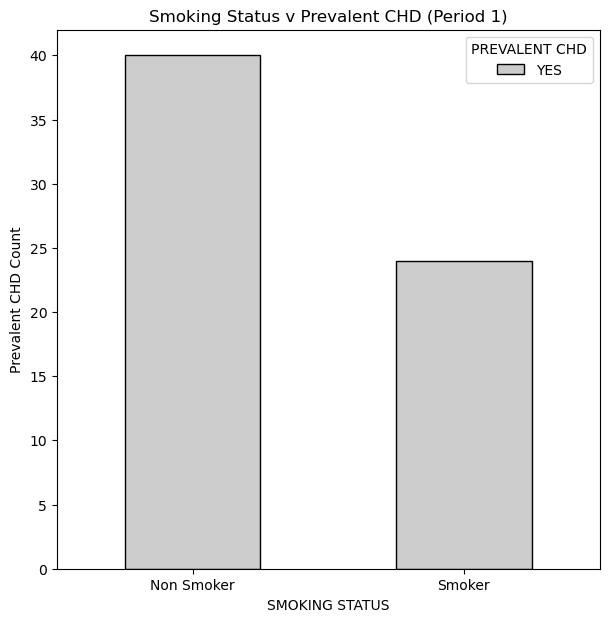

In [41]:
#List of xtick labels 
xtick_labels = ['Non Smoker', 'Smoker']

#Setting parameters and plotten the bar graph
period_1_plot = pivot_table_1.plot.bar(stacked=True, figsize = (7,7), ylabel = "Prevalent CHD Count", 
                                       title = "Smoking Status v Prevalent CHD (Period 1)", color = '0.8',
                                       edgecolor = 'black', rot = 0
                                       )

#Changing xtick label to reflect smoking status 
period_1_plot.set_xticklabels(xtick_labels)

# Chi-Squared Test (Period 1 Data)

In [42]:
#Df of Observed Vlaues 
expected_values = pivot_table_1.copy()
#Creating a Df of expected value 
rows_sum = pivot_table_1.sum(axis=1)
colums_sum = pivot_table_1.sum(axis=0)

#Calculating the expected values
expected_values.iloc[0, 0] = (rows_sum[0]*colums_sum[0])/(sum(rows_sum))
expected_values.iloc[1, 0] = (rows_sum[1]*colums_sum[0])/(sum(rows_sum))
expected_values

#Creating a table with the Observed and Expected values 
chi_square_table = pd.DataFrame()
chi_square_table['Observed'] = pivot_table_1
chi_square_table['Expected'] = expected_values['YES']
chi_square_table



,Observed,Expected
SMOKING STATUS,,
NO,40,40
YES,24,24


In [43]:
#Determing the critical vlaue 
critical_value = st.chi2.ppf(q = 0.95, df = 1)
print(f"This is the critical value {critical_value}")

This is the critical value 3.841458820694124


In [44]:
# Run the chi square test with stats.chisquare()
st.chisquare(chi_square_table['Observed'], chi_square_table['Expected'])

Power_divergenceResult(statistic=0.0, pvalue=1.0)

# Conclusion 

Since the chi square value of 0 does not exceed the critical value of 3.84, we conclude that the results are statistically not significant.

In [45]:
#Grouping Data into Smoking Status and Prevalent CHD 
period_3_data_gb = period_3_data.groupby(['SMOKING STATUS', 'PREVALENT CHD']).count()
#Keeping the count of smoking status prevalent CHD cases 
period_3_data_gb = pd.DataFrame(period_3_data_gb['ID'])
# Reset the index to make the groupby columns regular columns
period_3_data_gb = period_3_data_gb.reset_index()
# Pivot the DataFrame to create a more readable table for plotting
pivot_table_2 = period_3_data_gb.pivot(index='SMOKING STATUS', columns='PREVALENT CHD', values='ID')
pivot_table_2

PREVALENT CHD,YES
SMOKING STATUS,
NO,219
YES,81


[Text(0, 0, 'Non Smoker'), Text(1, 0, 'Smoker')]

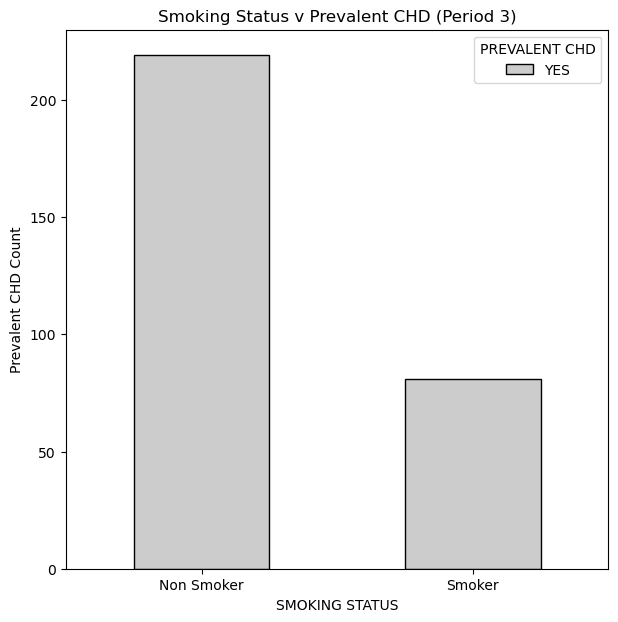

In [46]:
#Setting parameters and plotting the bar graph
period_3_plot = pivot_table_2.plot.bar(stacked=True, figsize = (7,7), ylabel = "Prevalent CHD Count", 
                                       title = "Smoking Status v Prevalent CHD (Period 3)", color = '0.8',
                                       edgecolor = 'black', rot = 0
                                       )

#Setting x tick labels by 
period_3_plot.set_xticklabels(xtick_labels)

# Chi-Squared Test (Period 3 Data)

In [47]:
#Df of Observed Vlaues 
expected_values = pivot_table_2.copy()
#Creating a Df of expected value 
rows_sum = pivot_table_2.sum(axis=1)
colums_sum = pivot_table_2.sum(axis=0)

#Calculating the expected values
expected_values.iloc[0, 0] = (rows_sum[0]*colums_sum[0])/(sum(rows_sum))
expected_values.iloc[1, 0] = (rows_sum[1]*colums_sum[0])/(sum(rows_sum))
expected_values

#Creating a table with the Observed and Expected values 
chi_square_table = pd.DataFrame()
chi_square_table['Observed'] = pivot_table_2
chi_square_table['Expected'] = expected_values['YES']
chi_square_table

,Observed,Expected
SMOKING STATUS,,
NO,219,219
YES,81,81


In [48]:
#Determing the critical vlaue 
critical_value = st.chi2.ppf(q = 0.95, df = 1)
print(f"This is the critical value {critical_value}")

This is the critical value 3.841458820694124


In [49]:
# Run the chi square test with stats.chisquare()
st.chisquare(chi_square_table['Observed'], chi_square_table['Expected'])

Power_divergenceResult(statistic=0.0, pvalue=1.0)

# Conclusion 

Since the chi square value of 0 does not exceed the critical value of 3.84, we conclude that the results are statistically not significant.

# Hypothesis 2: There is a correlation between Age, Smoking Status and Prevalent CHD 

In [50]:
# Create the bins for the age groups
bins = [25, 35, 45, 55, 65, 75, 85]

# Create the names labels
age_labels = ["25-35", "36-45", "46-55", "56-65", "66-75", "76-85"]

# Slicing the data and place it into bins
period_1_data["AGE GROUPS"] = pd.cut(period_1_data["AGE"], 
                                              bins, labels=age_labels, 
                                              include_lowest=True)

period_1_data

C:\Users\allan\AppData\Local\Temp\ipykernel_6340\948398095.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  period_1_data["AGE GROUPS"] = pd.cut(period_1_data["AGE"],


,ID,SEX,TOTAL CHOLESTROL,AGE,SMOKING STATUS,CIGS PER DAY,EDUCATION,PREVALENT CHD,PERIOD,BMI,AGE GROUPS
54,68397,M,227.0,40,NO,0,3,YES,1,23.62,36-45
177,208566,M,288.0,52,YES,20,3,YES,1,22.70,46-55
312,428306,M,265.0,41,YES,20,4,YES,1,23.35,36-45
420,556045,F,194.0,62,NO,0,1,YES,1,30.23,56-65
426,571377,F,320.0,58,NO,0,1,YES,1,31.77,56-65
...,...,...,...,...,...,...,...,...,...,...,...
8058,9746116,F,186.0,56,YES,10,4,YES,1,25.81,56-65
8112,9802787,M,218.0,49,NO,0,1,YES,1,25.44,46-55
8142,9838321,M,215.0,51,YES,10,1,YES,1,30.61,46-55
8163,9868819,F,252.0,60,NO,0,1,YES,1,40.23,56-65


In [51]:
#Grouping Data by relavent columns 
age_period_1_gb = pd.DataFrame(period_1_data.groupby(['AGE GROUPS', 'PREVALENT CHD']).count())
age_period_1_gb

,,ID,SEX,TOTAL CHOLESTROL,AGE,SMOKING STATUS,CIGS PER DAY,EDUCATION,PERIOD,BMI
AGE GROUPS,PREVALENT CHD,,,,,,,,,
25-35,YES,0,0,0,0,0,0,0,0,0
36-45,YES,9,9,9,9,9,9,9,9,9
46-55,YES,21,21,21,21,21,21,21,21,21
56-65,YES,32,32,32,32,32,32,32,32,32
66-75,YES,2,2,2,2,2,2,2,2,2
76-85,YES,0,0,0,0,0,0,0,0,0


In [52]:
# Pivot the data to create a table with 'AGE GROUPS' as rows, 'PREVALENT CHD' as columns, and 'ID(Count)' as values
pivot_table_3 =age_period_1_gb.pivot_table(index='AGE GROUPS', columns=['PREVALENT CHD'], values='ID')
pivot_table_3 = pd.DataFrame(pivot_table_3)
pivot_table_3 = pivot_table_3.drop(['25-35'])
pivot_table_3

PREVALENT CHD,YES
AGE GROUPS,
36-45,9
46-55,21
56-65,32
66-75,2
76-85,0


In [53]:
#Getting the sum of the column
colums_sum = pivot_table_3.sum(axis=0)
#List of prevalent 
count_PREV_CHDS = []

#Creating an ampty dataframe
age_CHD = pd.DataFrame()
#Ierates through each row of data
for x in range(0,5): 
    #Calculate percentage of prevalent CHD cases
    count_PREV_CHD = round((((pivot_table_3.iloc[x,0])/(colums_sum[0]))*100),2)
    #Appens percentages to a list
    count_PREV_CHDS.append(count_PREV_CHD)
#Sets list as the values for the Number of prevalent of CHD columns 
age_CHD['PERCENTAGE OF PREVALENT CHD CASES'] = count_PREV_CHDS

#Setting the index value as the data for the age groups column 
age_CHD['AGE GROUPS'] = pivot_table_3.index
age_CHD

,PERCENTAGE OF PREVALENT CHD CASES,AGE GROUPS
0,14.06,36-45
1,32.81,46-55
2,50.00,56-65
3,3.12,66-75
4,0.00,76-85


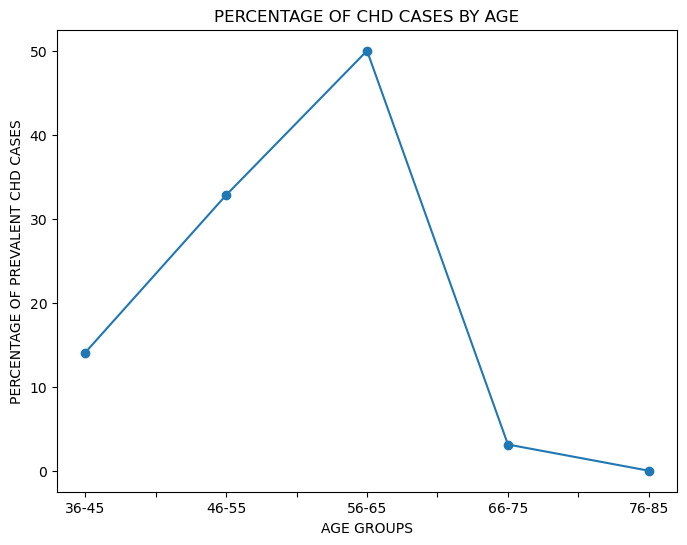

In [54]:
#Creating the plot 
ax = age_CHD.plot(x= 'AGE GROUPS', y=['PERCENTAGE OF PREVALENT CHD CASES'], marker='o', figsize=(8, 6), legend=False)
#Setting Label for axises 
ax.set_ylabel('PERCENTAGE OF PREVALENT CHD CASES')
ax.set_title('PERCENTAGE OF CHD CASES BY AGE')
plt.show()

In [55]:
# Slicing the data and place it into bins
period_3_data["AGE GROUPS"] = pd.cut(period_3_data["AGE"], 
                                              bins, labels=age_labels, 
                                              include_lowest=True)

period_3_data.head()

C:\Users\allan\AppData\Local\Temp\ipykernel_6340\1562719307.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  period_3_data["AGE GROUPS"] = pd.cut(period_3_data["AGE"],


,ID,SEX,TOTAL CHOLESTROL,AGE,SMOKING STATUS,CIGS PER DAY,EDUCATION,PREVALENT CHD,PERIOD,BMI,AGE GROUPS
56,68397,M,320.0,53,YES,8,3,YES,3,22.78,46-55
101,134914,F,180.0,52,YES,40,4,YES,3,22.36,46-55
155,199546,F,228.0,73,NO,0,1,YES,3,28.69,66-75
179,208566,M,223.0,64,NO,0,3,YES,3,22.11,56-65
194,228129,F,274.0,72,NO,0,3,YES,3,27.59,66-75


In [56]:
#Grouping Data by relavent columns 
age_period_3_gb = pd.DataFrame(period_3_data.groupby(['AGE GROUPS', 'PREVALENT CHD']).count())
age_period_3_gb

,,ID,SEX,TOTAL CHOLESTROL,AGE,SMOKING STATUS,CIGS PER DAY,EDUCATION,PERIOD,BMI
AGE GROUPS,PREVALENT CHD,,,,,,,,,
25-35,YES,0,0,0,0,0,0,0,0,0
36-45,YES,0,0,0,0,0,0,0,0,0
46-55,YES,47,47,47,47,47,47,47,47,47
56-65,YES,112,112,112,112,112,112,112,112,112
66-75,YES,123,123,123,123,123,123,123,123,123
76-85,YES,18,18,18,18,18,18,18,18,18


In [62]:
# Pivot the data to create a table with 'AGE GROUPS' as rows, 'SMOKING STATUS' as columns, and 'ID(Count)' as values
pivot_table_4 = age_period_3_gb.pivot_table(index='AGE GROUPS', columns=['PREVALENT CHD'], values='ID')
pivot_table_4 = pd.DataFrame(pivot_table_4)
#Dropping last row of data due all values being zero
pivot_table_4 = pivot_table_4.drop(['25-35', '36-45'])
pivot_table_4

PREVALENT CHD,YES
AGE GROUPS,
46-55,47
56-65,112
66-75,123
76-85,18


In [65]:
#Getting the sum of the column
colums_sum = pivot_table_4.sum(axis=0)
#List of prevalent 
count_PREV_CHDS_3 = []

#Creating an empty data frame
age_CHD_3 = pd.DataFrame()
#Ierates through each row of data
for x in range(0,4): 
    #Calculate percentage of prevalent CHD cases
    count_PREV_CHD_3 = round((((pivot_table_4.iloc[x,0])/(colums_sum[0]))*100),2)
    #Appens percentages to a list
    count_PREV_CHDS_3.append(count_PREV_CHD_3)
#Sets list as the values for the Number of prevalent of CHD columns 
age_CHD_3['PERCENTAGE OF PREVALENT CHD CASES'] = count_PREV_CHDS_3

#Setting the index value as the data for the age groups column 
age_CHD_3['AGE GROUPS'] = pivot_table_4.index
age_CHD_3

,PERCENTAGE OF PREVALENT CHD CASES,AGE GROUPS
0,15.67,46-55
1,37.33,56-65
2,41.00,66-75
3,6.00,76-85


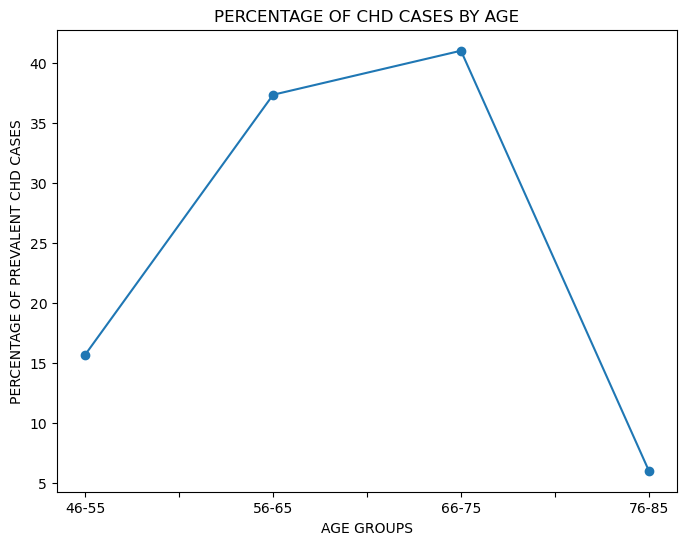

In [66]:
#Creating the plot 
ax = age_CHD_3.plot(x= 'AGE GROUPS', y=['PERCENTAGE OF PREVALENT CHD CASES'], marker='o', figsize=(8, 6), legend=False)
#Setting Label for axises 
ax.set_ylabel('PERCENTAGE OF PREVALENT CHD CASES')
ax.set_title('PERCENTAGE OF CHD CASES BY AGE')
plt.show()